In [25]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import hvplot.pandas
import hvplot.xarray
import cartopy.crs as ccrs
import geoviews as gv
import pyproj
import requests

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Import API key
#from api_keys import geoapify_key


In [26]:
master_crime_df = pd.DataFrame()
for file in os.listdir(os.getcwd()):
    if file.endswith(".csv"):
        master_crime_df = master_crime_df.append(pd.read_csv(file))
master_crime_df


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
1,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN,NaN
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified,NaN
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified,NaN
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
31692,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation,NaN
31693,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect,NaN
31694,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified,NaN
31695,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation,NaN


In [27]:
master_crime_df.isna().sum()


Crime ID                  16454
Month                         0
Reported by                   0
Falls within                  0
Longitude                     0
Latitude                      0
Location                      0
LSOA code                     0
LSOA name                     0
Crime type                    0
Last outcome category     16454
Context                  292913
dtype: int64

In [28]:
master_crime_df.drop("Context",inplace=True,axis=1)
master_crime_df


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Anti-social behaviour,NaN
1,NaN,2022-01,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham,Anti-social behaviour,NaN
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...,...
31692,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation
31693,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31694,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
31695,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation


In [11]:
master_crime_df.dropna(how="any", inplace=True)

master_crime_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
2,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
3,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Investigation complete; no suspect identified
4,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...,2022-01,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham,Violence and sexual offences,Unable to prosecute suspect
5,32b5ba98624cd24da2413933265aaee270c68b111f691b...,2022-01,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham,Violence and sexual offences,Unable to prosecute suspect
6,2749744b442839d28fd2b0c472107fc6b7ca3e8406e077...,2022-01,West Midlands Police,West Midlands Police,-1.849895,52.599172,On or near Kesterton Road,E01009419,Birmingham,Vehicle crime,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...,...
31692,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...,2022-09,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation
31693,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...,2022-09,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Wolverhampton,Violence and sexual offences,Unable to prosecute suspect
31694,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Investigation complete; no suspect identified
31695,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...,2022-09,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Wolverhampton,Violence and sexual offences,Under investigation


In [29]:
crime_data = master_crime_df.rename(columns= {
                                                "LSOA name":"City Name"})
new_crime_data = crime_data[["City Name", "Month", "Crime type", "Reported by", "Falls within", "Longitude", "Latitude", "Location", "LSOA code","Last outcome category", "Crime ID"]]
#new_crime_data = new_crime_data.set_index("City Name")
new_crime_data


,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID
0,Birmingham,2022-01,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,NaN,NaN
1,Birmingham,2022-01,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,NaN,NaN
2,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...
3,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...
4,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...
...,...,...,...,...,...,...,...,...,...,...,...
31692,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120997,52.579436,On or near Dartmouth Street,E01010530,Under investigation,b3fca1c631f57f1816961c5c89afadd9cd24025eac669b...
31693,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.117684,52.582451,On or near Duke Street,E01010530,Unable to prosecute suspect,f6846073eefdfdafa7de407d53ad093701bac32cffdfc8...
31694,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Investigation complete; no suspect identified,0caa10f10bfcdc1fd74f26547be0963cf4d44c3694b21f...
31695,Wolverhampton,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-2.120010,52.585361,On or near Union Street,E01010530,Under investigation,a4c7cf185a1330eca90053ba9ff78c869943cae08f95ac...


In [44]:
new_crime_data_bham = new_crime_data.loc[(new_crime_data["City Name"]=="Birmingham")]
new_crime_data_cov = new_crime_data.loc[(new_crime_data["City Name"]=="Coventry")]
new_crime_data_dud = new_crime_data.loc[(new_crime_data["City Name"]=="Dudley")]
new_crime_data_wham = new_crime_data.loc[(new_crime_data["City Name"]=="Wolverhampton")]
new_crime_data_bham

,City Name,Month,Crime type,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Last outcome category,Crime ID
0,Birmingham,2022-01,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,NaN,NaN
1,Birmingham,2022-01,Anti-social behaviour,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,NaN,NaN
2,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,b3e21c270ca0e46b6e5292fa54533096a29d04b13fe405...
3,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Investigation complete; no suspect identified,4e2b0617b51656677f40ac60aaec1efa9f2a511f7b9d9c...
4,Birmingham,2022-01,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Unable to prosecute suspect,8bc621435fd62823561fe8cb3c7266ba2b63806b1c5840...
...,...,...,...,...,...,...,...,...,...,...,...
14102,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.853639,52.445503,On or near Bromyard Road,E01033641,Under investigation,d81238b7058061ce726de62dddb48e1c85ce6892835d19...
14103,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.849881,52.451693,On or near Weston Lane,E01033641,Investigation complete; no suspect identified,4f1cb738f428771f4c2da50873afb7a75708b9e12535ff...
14104,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.861639,52.451599,On or near Evelyn Road,E01033641,Investigation complete; no suspect identified,d5cdf833cef02fc6542a0a556dbedb290420b2ba99ccf0...
14105,Birmingham,2022-09,Violence and sexual offences,West Midlands Police,West Midlands Police,-1.849881,52.451693,On or near Weston Lane,E01033641,Investigation complete; no suspect identified,e330b25ffe8baa74df341b91b3dbaa2db859ea7b95e136...


In [31]:
bham_df = new_crime_data_bham.groupby(["Month"]).agg({"Crime ID":"count"})
bham_df

,Crime ID
Month,
2022-01,13103
2022-02,12325
2022-03,13575
2022-04,13066
2022-05,14044
2022-06,14192
2022-07,14623
2022-08,14228
2022-09,13428


<AxesSubplot:xlabel='Month'>

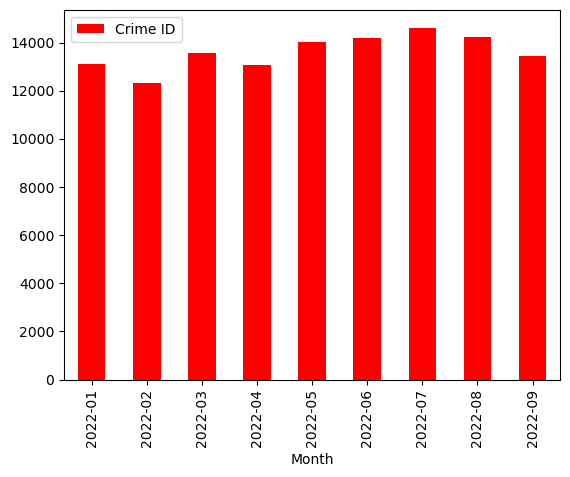

In [33]:
bham_df_plot = bham_df.plot.bar(color = "r")
bham_df_plot

<AxesSubplot:xlabel='Month'>

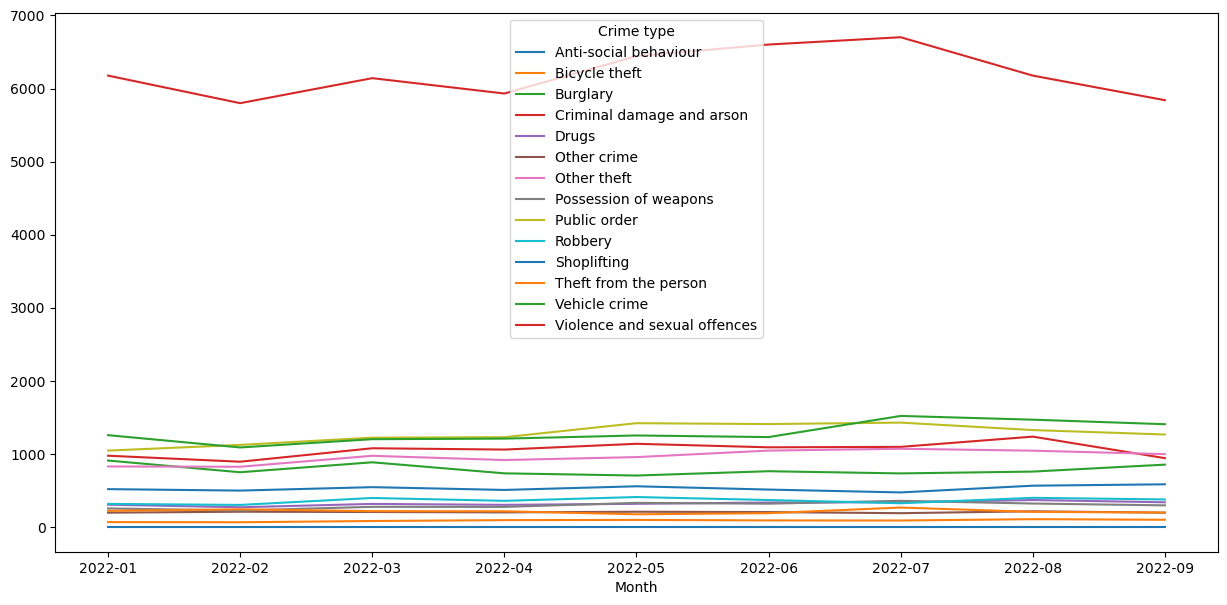

In [45]:
fig, ax = plt.subplots(figsize=(15,7))
new_crime_data_bham.groupby(["Month","Crime type"]).count()["Crime ID"].unstack().plot(ax=ax)

In [ ]:
pd.pivot(index=g, columns=df['months'], values=df['value']).rename(columns=d).plot()